### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
male_data=pd.read_csv('male_complete.csv')

In [3]:
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [4]:
male_swim = male_data[male_data['Sport'] == 'Weightlifting']

In [5]:
male_swim['Sport'].describe

<bound method NDFrame.describe of 13654    Weightlifting
13655    Weightlifting
13656    Weightlifting
13657    Weightlifting
13658    Weightlifting
             ...      
14444    Weightlifting
14445    Weightlifting
14446    Weightlifting
14447    Weightlifting
14448    Weightlifting
Name: Sport, Length: 795, dtype: object>

In [6]:
male_swim['Medal'].describe

<bound method NDFrame.describe of 13654      NA
13655      NA
13656      NA
13657      NA
13658      NA
         ... 
14444      NA
14445    Gold
14446      NA
14447      NA
14448      NA
Name: Medal, Length: 795, dtype: object>

In [7]:
male_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 13654 to 14448
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      795 non-null    int64  
 1   Unnamed: 0_x    795 non-null    int64  
 2   ID              795 non-null    int64  
 3   Name            795 non-null    object 
 4   Sex             795 non-null    object 
 5   Age             795 non-null    float64
 6   Height          795 non-null    float64
 7   Weight          795 non-null    float64
 8   NOC             795 non-null    object 
 9   Games           795 non-null    object 
 10  Year            795 non-null    int64  
 11  Season          795 non-null    object 
 12  City            795 non-null    object 
 13  Sport           795 non-null    object 
 14  Event           795 non-null    object 
 15  Medal           795 non-null    object 
 16  Team            795 non-null    object 
 17  Unnamed: 0_y    795 non-null 

In [8]:
# Extract Response and Predictors
y = pd.DataFrame(male_swim["Medal"]).astype('category')
X = pd.DataFrame(male_swim[["Age", "Height","GDP","Population","GDP Per Capita"]])

In [9]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (596, 1) (596, 5)
Test Set  : (199, 1) (199, 5)


In [10]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [11]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Height,GDP,Population,GDP Per Capita,Medal
13899,32.0,178.0,2.540000e+09,1.025770e+05,24761.886193,NA
13686,32.0,155.0,7.314100e+10,1.138215e+07,6425.941119,NA
13831,32.0,173.0,2.410000e+11,1.095514e+07,21998.804032,Bronze
14226,23.0,165.0,1.120000e+11,2.600000e+07,4307.692308,Bronze
14192,22.0,170.0,9.327048e+10,4.500464e+07,2072.463395,NA
...,...,...,...,...,...,...
14338,26.0,153.0,1.040000e+11,1.010715e+07,10289.749451,NA
14020,24.0,170.0,5.120000e+08,5.926400e+04,8639.308855,NA
13670,23.0,178.0,1.660000e+12,1.427424e+08,11629.344760,Bronze
14155,30.0,175.0,1.829199e+10,1.488363e+07,1229.000958,NA


In [12]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        675
Silver     40
Bronze     40
Gold       40
Name: Medal, dtype: int64


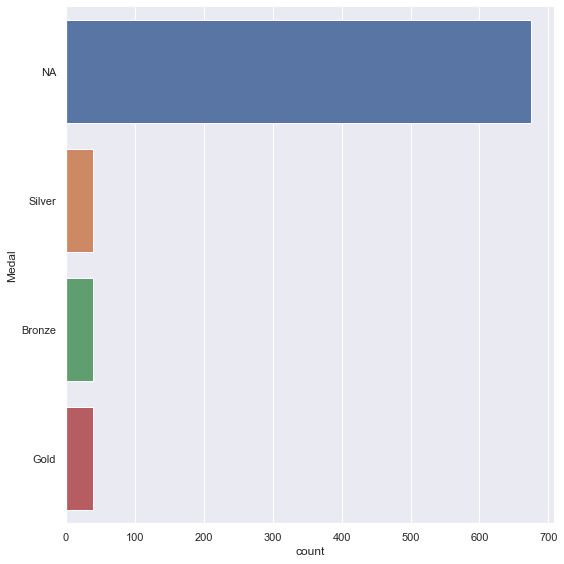

In [13]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(male_swim["Medal"].unique()))

# Pokemons of each Primary Type
print(male_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = male_swim, kind = "count", height = 8)

In [14]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(596, 5) (596, 1)


In [15]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(2064, 5) (2064, 1)


In [16]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Height,GDP,Population,GDP Per Capita,Medal
0,32.000000,178.000000,2.540000e+09,1.025770e+05,24761.886193,NA
1,32.000000,155.000000,7.314100e+10,1.138215e+07,6425.941119,NA
2,32.000000,173.000000,2.410000e+11,1.095514e+07,21998.804032,Bronze
3,23.000000,165.000000,1.120000e+11,2.600000e+07,4307.692308,Bronze
4,22.000000,170.000000,9.327048e+10,4.500464e+07,2072.463395,NA
...,...,...,...,...,...,...
2059,24.000000,161.696618,8.114175e+11,1.090002e+08,12202.888868,Silver
2060,27.197700,185.982747,6.322955e+11,7.076254e+07,9454.697165,Silver
2061,24.000000,161.246006,8.803610e+11,1.994844e+08,6695.290724,Silver
2062,28.481272,186.048999,1.707550e+12,1.427821e+08,11958.169468,Silver


In [17]:
X_test

,Age,Height,GDP,Population,GDP Per Capita
14345,16.0,172.0,1.023670e+08,9.054200e+04,1130.602803
13693,22.0,172.0,2.870000e+11,4.955757e+07,5791.244020
13742,28.0,171.0,1.950000e+12,8.221151e+07,23719.307034
14165,26.0,155.0,6.605140e+09,5.607000e+06,1178.016753
13887,22.0,171.0,6.176264e+10,1.444756e+07,4274.952065
...,...,...,...,...,...
13869,33.0,159.0,2.820000e+11,4.865342e+07,5796.098317
14266,17.0,166.0,2.070000e+12,5.953972e+07,34766.708750
14208,22.0,176.0,1.370000e+11,1.779703e+07,7697.912776
14346,22.0,172.0,1.120000e+13,1.378665e+09,8123.800923


Number of Medal Types : 4
Bronze    516
Gold      516
NA        516
Silver    516
Name: Medal, dtype: int64


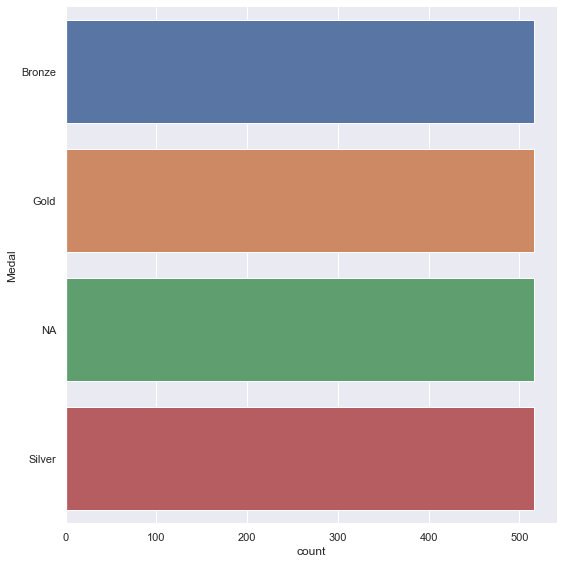

In [18]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

# Pokemons of each Primary Type
print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (1548, 1) (1548, 5)
Test Set  : (516, 1) (516, 5)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.977390180878553

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8236434108527132



<AxesSubplot:>

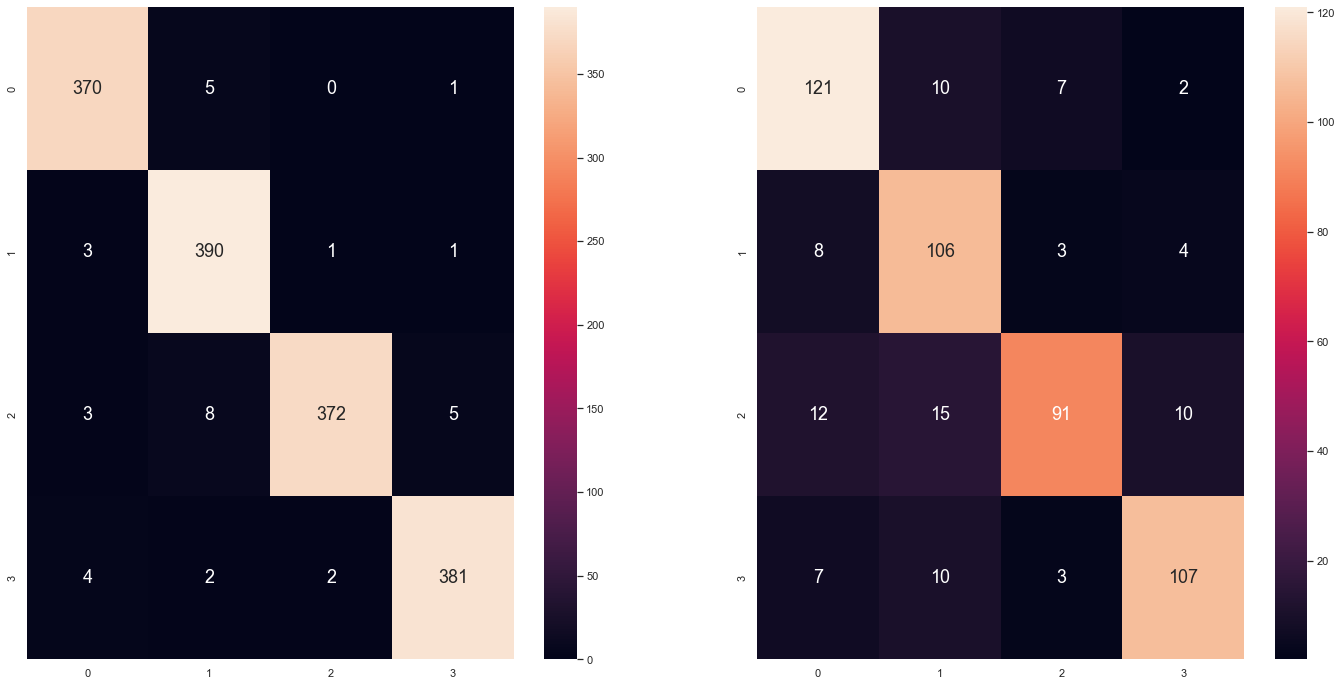

In [19]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 10)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

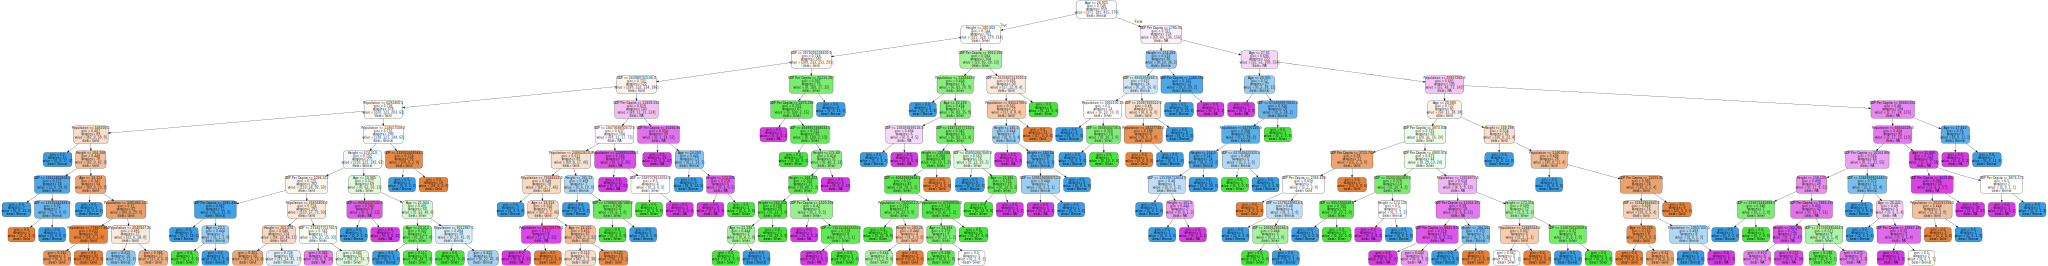

In [20]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [21]:
#graph.render("Tree_new")

### Predictions

In [22]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.6331658291457286


<AxesSubplot:>

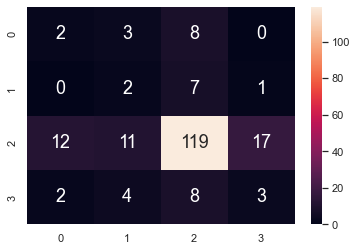

In [23]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})